<a href="https://colab.research.google.com/github/OscarRojasG/Laberinto/blob/main/Maze.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [154]:
import numpy as np
import random
import sys
import matplotlib.pyplot as plt

maze_size = 5
start_pos = (1,2)
end_pos = (4,4)

In [155]:
move_matrix = np.zeros((maze_size, maze_size), dtype=int)
move_matrix[start_pos] = 1

# Inicializar diccionario de coordenadas visitadas
visited = dict()
for x in range(0, maze_size):
  for y in range(0, maze_size):
    visited[(x,y)] = False

# Movimientos posibles
MOVE_LEFT = 1
MOVE_RIGHT = 2
MOVE_TOP = 3
MOVE_DOWN = 4

path = [start_pos]
visited[start_pos] = True

# Mientras no se llegue a la meta
while True:
  current_pos = path[-1]
  if current_pos == end_pos:
    break

  x = current_pos[0]
  y = current_pos[1]

  available_moves = []

  # Añadir movimientos factibles
  if x - 1 >= 0 and visited[(x-1,y)] == False:
    available_moves.append(MOVE_LEFT)
  if x + 1 < maze_size and visited[(x+1,y)] == False:
    available_moves.append(MOVE_RIGHT)
  if y - 1 >= 0 and visited[(x,y-1)] == False:
    available_moves.append(MOVE_TOP)
  if y + 1 < maze_size and visited[(x,y+1)] == False:
    available_moves.append(MOVE_DOWN)

  if len(available_moves) == 0:
    path.pop()
    continue

  move = random.choice(available_moves) # Movimiento aleatorio

  # Actualizar coordenadas
  if move == MOVE_LEFT:
    x = x-1
  elif move == MOVE_RIGHT:
    x = x+1
  elif move == MOVE_TOP:
    y = y-1
  elif move == MOVE_DOWN:
    y = y+1

  current_pos = (x,y)
  path.append(current_pos)
  visited[current_pos] = True

path

[(1, 2),
 (0, 2),
 (0, 3),
 (0, 4),
 (1, 4),
 (2, 4),
 (2, 3),
 (2, 2),
 (3, 2),
 (3, 3),
 (4, 3),
 (4, 4)]

In [156]:
# Ampliar tamaño de laberinto
maze_size = maze_size * 2 - 1
start_pos = (start_pos[0] * 2, start_pos[1] * 2)
end_pos = (end_pos[0] * 2, end_pos[1] * 2)

# Crear matriz
m = np.zeros((maze_size, maze_size), dtype=int)

# Dibujar camino
for i in range(0, len(path)-1):
  x1 = path[i][0] * 2
  y1 = path[i][1] * 2
  x2 = path[i+1][0] * 2
  y2 = path[i+1][1] * 2

  m[x1,y1] = 1

  if x1 > x2:
    m[x1-1,y1] = 1
  elif x1 < x2:
    m[x1+1,y1] = 1
  elif y1 > y2:
    m[x1,y1-1] = 1
  elif y1 < y2:
    m[x1,y1+1] = 1

m[end_pos] = 1

In [157]:
np.set_printoptions(threshold=sys.maxsize)
m

array([[0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 1],
       [0, 0, 0, 0, 0, 0, 0, 0, 1],
       [0, 0, 0, 0, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 0],
       [0, 0, 0, 0, 1, 1, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 0, 0],
       [0, 0, 0, 0, 0, 0, 1, 1, 1]])

In [158]:
for i in range(0, maze_size, 2):
  for j in range(0, maze_size, 2):
    x = i
    y = j

    while m[x,y] == 0:
      m[x,y] = 1

      available_moves = []

      # Añadir movimientos factibles
      if x - 2 >= 0:
        available_moves.append(MOVE_LEFT)
      if x + 2 < maze_size:
        available_moves.append(MOVE_RIGHT)
      if y - 2 >= 0:
        available_moves.append(MOVE_TOP)
      if y + 2 < maze_size:
        available_moves.append(MOVE_DOWN)

      move = random.choice(available_moves) # Movimiento aleatorio

      if move == MOVE_LEFT:
        m[x-1,y] = 1
        x = x-2
      elif move == MOVE_RIGHT:
        m[x+1,y] = 1
        x = x+2
      elif move == MOVE_TOP:
        m[x,y-1] = 1
        y = y-2
      elif move == MOVE_DOWN:
        m[x,y+1] = 1
        y = y+2

In [159]:
m

array([[1, 0, 1, 0, 1, 1, 1, 1, 1],
       [1, 0, 1, 0, 1, 0, 0, 0, 1],
       [1, 1, 1, 0, 1, 0, 1, 0, 1],
       [0, 0, 0, 0, 0, 0, 1, 0, 1],
       [1, 1, 1, 1, 1, 1, 1, 1, 1],
       [0, 0, 0, 0, 1, 0, 0, 0, 1],
       [1, 1, 1, 0, 1, 1, 1, 0, 1],
       [1, 0, 1, 0, 1, 0, 1, 0, 0],
       [1, 1, 1, 0, 1, 0, 1, 1, 1]])

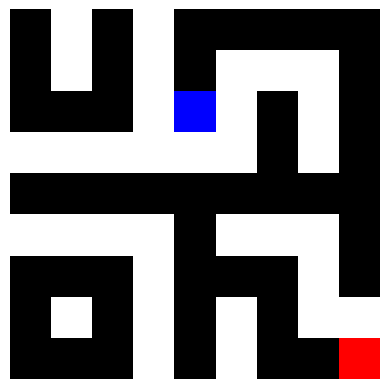

In [172]:
color_matrix = np.zeros((maze_size, maze_size, 3))

for i in range(0, maze_size):
  for j in range(0, maze_size):
    value = m[i,j]
    color_matrix[i,j] = [1-value] * 3

color_matrix[start_pos] = [0,0,255]
color_matrix[end_pos] = [255,0,0]

plt.imshow(color_matrix, interpolation='nearest')
plt.xticks([])
plt.yticks([])
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)
plt.gca().spines['bottom'].set_visible(False)
plt.gca().spines['left'].set_visible(False)
plt.show()